#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math

from IPython.display import Image
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

%matplotlib inline

In [10]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


In [11]:
# Membaca dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)

# Mengonversi kolom 'time' menjadi tipe datetime
df['time'] = pd.to_datetime(df['time'])

# Menerapkan filter untuk tahun 1966 - 2016
df_filtered = df[(df['time'].dt.year >= 1966) & (df['time'].dt.year <= 2016)]

# Menampilkan DataFrame yang telah difilter
df = df_filtered
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31 17:22:51.700000+00:00,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30 06:41:20.480000+00:00,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us
5,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,NaN,55.0,1.753,0.77,...,2017-03-23T22:52:09.040Z,"23km W of Molibagu, Indonesia",earthquake,6.6,7.2,0.099,30.0,reviewed,us,us
6,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,NaN,26.0,3.553,1.42,...,2017-03-23T22:52:09.040Z,"29km S of Tolotangga, Indonesia",earthquake,6.2,1.8,NaN,NaN,reviewed,us,us
7,2016-12-29 14:37:33.160000+00:00,3.9723,126.7909,82.30,4.3,mb,NaN,177.0,3.230,0.83,...,2017-03-23T22:52:08.040Z,"216km SE of Sarangani, Philippines",earthquake,5.3,14.5,0.177,9.0,reviewed,us,us
8,2016-12-29 08:16:44.850000+00:00,-4.6133,101.7366,31.98,4.3,mb,NaN,112.0,1.241,0.62,...,2017-03-23T22:52:08.040Z,"107km SSW of Bengkulu, Indonesia",earthquake,5.2,6.8,0.147,13.0,reviewed,us,us
9,2016-12-29 01:22:26.280000+00:00,-4.7053,101.6970,31.82,4.3,mb,NaN,207.0,1.300,0.35,...,2017-03-23T22:52:08.040Z,"118km SSW of Bengkulu, Indonesia",earthquake,10.8,5.2,0.217,6.0,reviewed,us,us


In [12]:
# daftar jenis magnitude
df['magType'].value_counts()

mb     49379
mwc     2669
mw      1414
mwb      440
ms       282
mww      227
ml        35
md        12
mwr        7
Mb         1
m          1
Name: magType, dtype: int64

**Gutenberg–Richter law**

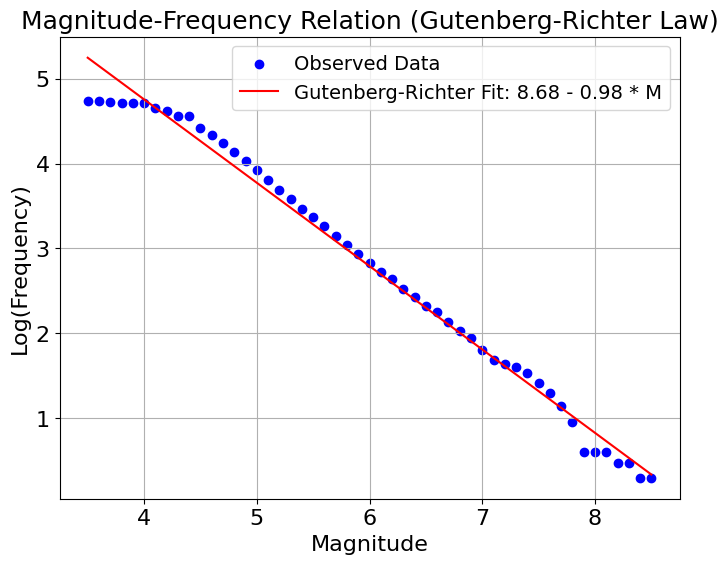

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = df

# Hapus nilai NaN atau infinitas dari kolom 'mag'
data = data.dropna(subset=['mag'])

# Hitung frekuensi kejadian gempa per rentang magnitudo
magnitudes = np.arange(3.5, 8.6, 0.1)  # Rentang magnitudo
frequency = []

for mag in magnitudes:
    count = len(data[data['mag'] >= mag])
    frequency.append(count)

# Hapus nol dari frekuensi untuk menghindari log(0)
frequency = np.array(frequency)
frequency = frequency[frequency != 0]

# Fungsi untuk regresi linear pada skala log-log (Gutenberg-Richter)
def gutenberg_richter(m, a, b):
    return a - b * m

# Perkirakan parameter a dan b untuk garis regresi
popt, pcov = curve_fit(gutenberg_richter, magnitudes[:len(frequency)], np.log10(frequency))

# Plot MFR (Magnitude-Frequency Relation) pada skala log-log dengan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(magnitudes[:len(frequency)], np.log10(frequency), color='blue', label='Observed Data')
plt.plot(magnitudes[:len(frequency)], gutenberg_richter(magnitudes[:len(frequency)], *popt), color='red', label=f'Gutenberg-Richter Fit: {popt[0]:.2f} - {popt[1]:.2f} * M')
plt.xlabel('Magnitude')
plt.ylabel('Log(Frequency)')
plt.title('Magnitude-Frequency Relation (Gutenberg-Richter Law)')
plt.legend()
plt.grid(True)
plt.show()


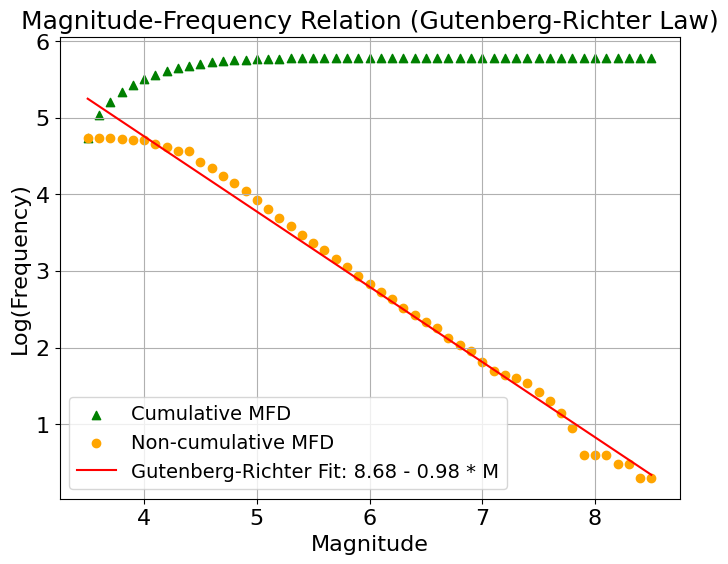

In [17]:
# Simpan nilai MFD kumulatif dan non-kumulatif
magnitudes = np.arange(3.5, 8.6, 0.1)  # Rentang magnitudo
cumulative_values = np.cumsum(frequency)
non_cumulative_values = frequency

# Plot MFR (Magnitude-Frequency Relation) pada skala log-log dengan garis regresi
plt.figure(figsize=(8, 6))

# Scatter plot untuk MFD kumulatif (gunakan segitiga)
plt.scatter(magnitudes[:len(cumulative_values)], np.log10(cumulative_values), color='green', marker='^', label='Cumulative MFD')

# Scatter plot untuk MFD non-kumulatif (gunakan lingkaran)
plt.scatter(magnitudes[:len(non_cumulative_values)], np.log10(non_cumulative_values), color='orange', marker='o', label='Non-cumulative MFD')

# Plot garis regresi
plt.plot(magnitudes[:len(frequency)], gutenberg_richter(magnitudes[:len(frequency)], *popt), color='red', label=f'Gutenberg-Richter Fit: {popt[0]:.2f} - {popt[1]:.2f} * M')

plt.xlabel('Magnitude')
plt.ylabel('Log(Frequency)')
plt.title('Magnitude-Frequency Relation (Gutenberg-Richter Law)')
plt.legend()
plt.grid(True)
plt.show()
